In [1]:
from utils import *
from nonlinalg import *

from numpy.linalg import lstsq
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
X = load_data(0)
Y = load_data(1)
Dt = 0.01

# 1 - linear Approximation

In [3]:
A, res, r, s = lstsq(X, (Y - X) / Dt, rcond=None)

print(A)

[[-1.0016012   0.08672716]
 [-0.02534942 -4.32671381]]


In [4]:
dts = np.linspace(0, 1, 1001)
dphi = lambda t, x: x @ A
sols, mses = apply_estimator(dphi, X, Y, 1001)

print(f"found dt={dts[mses.argmin()]}, with mse={mses.min():.4f}")


found dt=0.01, with mse=0.0186


Text(0.5, 1.0, 'Prediction over ground truth')

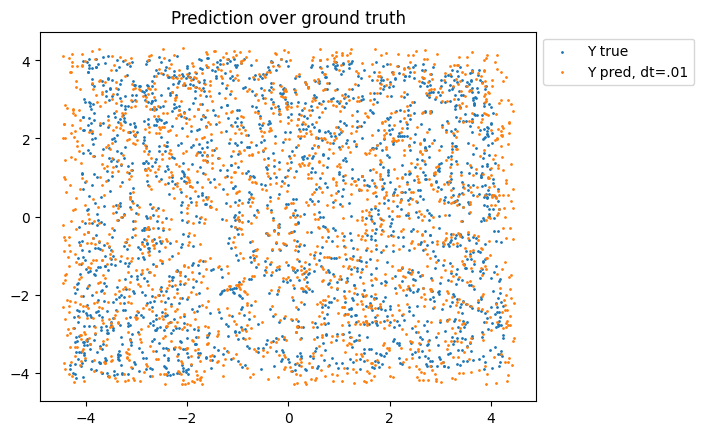

In [5]:
found_sol = sols[:,:,mses.argmin()]
plt.scatter(Y[:, 0], Y[:, 1], s=1)
plt.scatter(found_sol[:, 0], found_sol[:, 1], s=1)
plt.legend(["Y true", "Y pred, dt=.01"], bbox_to_anchor=(1, 1))
plt.title("Prediction over ground truth")

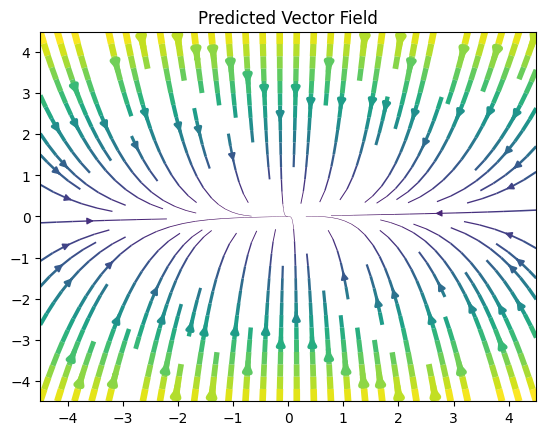

In [6]:
U1, U2, X1, X2 = plot_vector_field(dphi, [-4.5, -4.5], [4.5, 4.5], 20)

# 2 - Nonlinear Approximation

In [7]:
C, sample_points, e = nonlinear_approximation(X, Y, .1, 100)

In [8]:
df = lambda t, x: apply_phi(sample_points, x, e, True) @ C
sols, mses = apply_estimator(df, X, Y, 1001)

print(f"found dt={dts[mses.argmin()]}, with mse={mses.min():.4f}")

found dt=0.115, with mse=0.0004


Text(0.5, 1.0, 'Prediction over ground truth')

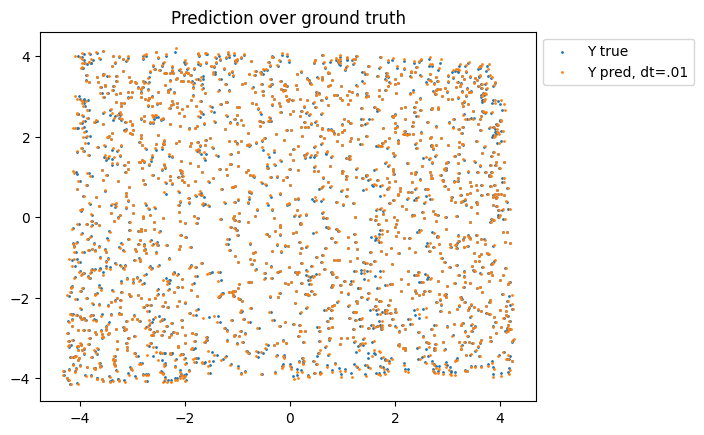

In [9]:
found_sol = sols[:,:,mses.argmin()]
plt.scatter(Y[:, 0], Y[:, 1], s=1)
plt.scatter(found_sol[:, 0], found_sol[:, 1], s=1)
plt.legend(["Y true", "Y pred, dt=.01"], bbox_to_anchor=(1, 1))
plt.title("Prediction over ground truth")

In [10]:
sols, mses = apply_estimator(df, X, Y, 101, 10)

Text(0.5, 1.0, 'Prediction over ground truth after t=10')

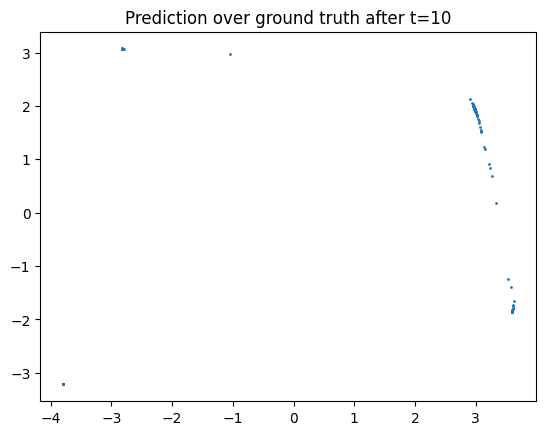

In [11]:
found_sol = sols[:,:,-1]
plt.scatter(found_sol[:, 0], found_sol[:, 1], s=1)
plt.title("Prediction over ground truth after t=10")

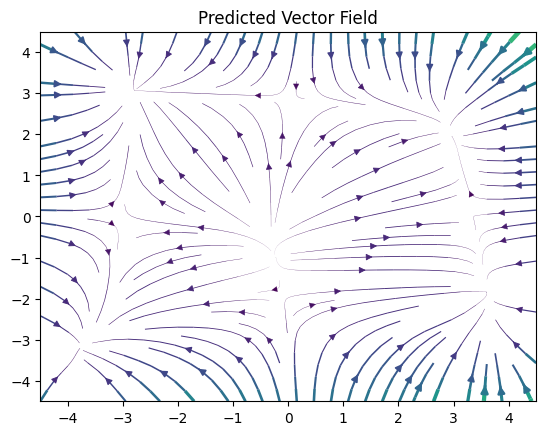

In [12]:
U1, U2, X1, X2 = plot_vector_field(df, [-4.5, -4.5], [4.5, 4.5], 20)